In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
df = pd.read_excel('sales.xlsx')

In [4]:
df.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [7]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

# Questions

## 2. Informations de base :

a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
données ?

In [8]:
df.pizza_id.value_counts().count()

91

b.  Combien de commandes uniques (order_id distincts) figurent dans le jeu
de données ?

In [9]:
df.order_id.value_counts().count()

21350

## 3. Analyse temporelle :

a. Quelle est la plage de dates dans le jeu de données ?

In [10]:
print(f"plage de dates : {df['order_date'].min()} à {df['order_date'].max()}")

plage de dates : 2015-01-01 00:00:00 à 2015-12-31 00:00:00


b. Combien de commandes ont été passées chaque jour ?

## ------------------------------------------------------------

In [11]:
df.groupby('order_date')['order_id'].nunique()

order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64

c. Quelle est la durée moyenne pour traiter une commande ?

C'est une question piège nous n'avons aucun moyen de calculer correctement cette valeur, il faudrait que le Dataframe contienne une colonne order_processed ou autre pour pouvoir faire ce calcul.

Une très mauvaise solution serait de calculer la différence de temps passée entre chaque commandes triées par order_id (1 et 2 par ex) pour essayer de trouver cette valeur. Cela ne serait pas très pertinent car les résultats ne seront pas nécessairement représentatif du temps que Jo va prendre pour traiter une commande, et si il prend une pause, qu'il n'a pas de clients pendant un moment ou ferme la pizzaria après une commande, le calcul va considérer cela comme du temps de préparation de la commande et fausser les résultats

## 4. Analyse de la quantité :

a. Quelle est la quantité moyenne de pizzas commandées ?

In [12]:
df.groupby('order_id')['quantity'].sum().mean()


2.321967213114754

Values Check

In [13]:
# You can check the results here
# df.quantity.value_counts()
# df[df.quantity == 4]
# df.groupby('order_id')['quantity'].sum()[5264]
# df[df.order_id == 5264]

b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [14]:
# df.pizza_size.value_counts().to_frame().reset_index()
df.groupby(['pizza_size'])['quantity'].count().sum()

48620

In [15]:
# df.tail(20)

In [16]:
# df.tail(20)

In [17]:
df.quantity.sum()

49574

In [18]:
plt.plot(temp_df['pizza_size'], temp_df['count'])

NameError: name 'temp_df' is not defined

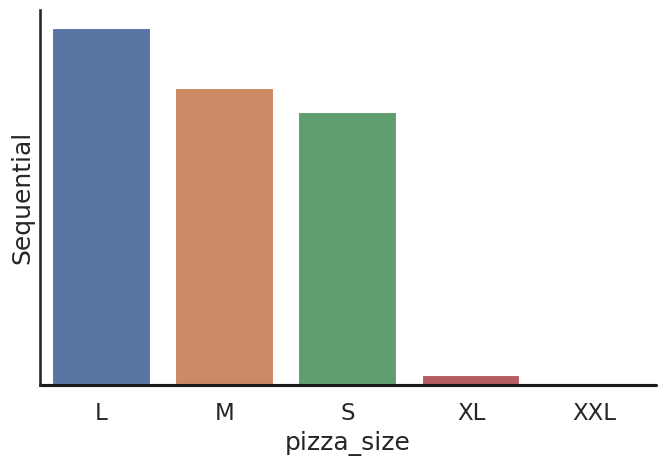

In [ ]:
sns.set_theme(style="white", context="talk")
f, ax1 = plt.subplots(1, 1, figsize=(7, 5))

# Barplot for Sequential data
sns.barplot(x=temp_df.pizza_size, y=temp_df['count'], hue=temp_df.pizza_size, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

plt.show()


In [ ]:
df.pizza_size.value_counts().index[0]


'L'

c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [ ]:
df.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [ ]:
df.pizza_category.value_counts().index[0]

'Classic'

## 5. Analyse des prix :

a. Quel est le prix unitaire moyen des pizzas ?

In [ ]:
df.unit_price.mean().round(1)
#quantity


16.5

b. Quel est le prix total moyen d'une commande ?

In [ ]:
df.groupby('order_id')['total_price'].sum().mean().round(2)

38.31

c. Quelle pizza a le prix unitaire le plus élevé ?

In [ ]:
# Je vérifies d'abord qu'il y a bien une seule pizza qui à le prix le plus élevé
df[df.unit_price == df.unit_price.max()]['pizza_id'].value_counts().count()

# ceci donne le bon nom de pizza mais on peut faire un peu mieux (case en dessous)
# df[df.unit_price == df.unit_price.max()]['pizza_name'].value_counts()[0]

NameError: name 'df' is not defined

In [ ]:
# plus fluide :
df[df.unit_price == df.unit_price.max()].iloc[0]['pizza_id']

'the_greek_xxl'

## 6. Répartition par taille et catégorie :

a. Combien de pizzas de chaque taille ont été vendues ?

In [ ]:
df.groupby('pizza_size')['quantity'].sum()

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [ ]:
df.groupby('pizza_category')['pizza_name'].nunique()
# df.groupby('pizza_category')['pizza_id'].nunique()

pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64

In [ ]:
# Une bien pire façon de l'afficher
# df.groupby('pizza_category')['pizza_name'].value_counts().index

## 7. Analyse des ingrédients :

a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
pizzas ?


In [ ]:
# avoiding repeating operation error by checking if last element of the
# column has already been converted to a list instead of string
if not isinstance(df.pizza_ingredients[df.pizza_ingredients.shape[0]-1], list):
    # cleaning list of ingredients
    df.pizza_ingredients = df.pizza_ingredients.apply(lambda x : x.split(', '))
df.pizza_ingredients.explode().value_counts().to_frame()


,count
pizza_ingredients,
Garlic,27422
Tomatoes,26601
Red Onions,19547
Red Peppers,16284
Mozzarella Cheese,10333
...,...
Brie Carre Cheese,480
Prosciutto,480
Caramelized Onions,480


In [ ]:
# new_df = df[['pizza_id', 'pizza_ingredients']].drop_duplicates()


b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
pepperoni, champignons) ?

In [ ]:
# Just making sure df_filtered
df_filtered = df.drop_duplicates(subset='pizza_ingredients')

In [ ]:
# Changer l'ingrédient si souhaité
ingredient = 'Garlic'

df_filtered.loc[:,'ingredient_count'] = df_filtered.loc[:,('pizza_ingredients')].apply(lambda x: x.count(ingredient) if isinstance(x, list) else 0)
df_filtered.groupby('pizza_category')['ingredient_count'].sum().reset_index()

# contain

/tmp/ipykernel_1181/1037540494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'ingredient_count'] = df_filtered.loc[:,('pizza_ingredients')].apply(lambda x: x.count(ingredient) if isinstance(x, list) else 0)


,pizza_category,ingredient_count
0,Chicken,2
1,Classic,3
2,Supreme,8
3,Veggie,7


## 8. Détails de la commande :

a. Quelle est la répartition du nombre de pizzas par commande ?

In [ ]:
df.groupby('order_id')['quantity'].count().value_counts().reset_index()\
    .rename(columns={'quantity': 'Nombre de pizzas par commande'})


,Nombre de pizzas par commande,count
0,1,8201
1,2,6196
2,3,3325
3,4,2888
4,5,144
5,8,83
6,6,75
7,7,75
8,12,71
9,11,69


In [ ]:
sum(df.groupby('order_id')['quantity'].count().value_counts().reset_index()\
    .rename(columns={'quantity': 'Nombre de pizzas par commande'})['count'])

21350

In [ ]:
sum(df.quantity)

49574

b. Quelle est la répartition des prix totaux pour les commandes ?

In [ ]:
df.groupby(['order_id','quantity'])['total_price'].sum().max()

282.65

9.75
83.0


<Axes: xlabel='total_price', ylabel='Count'>

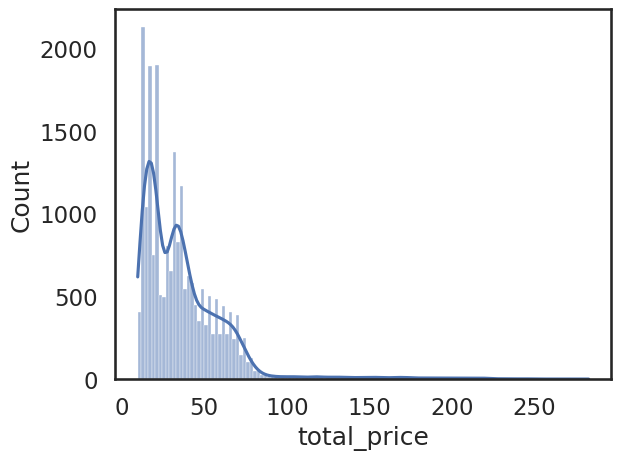

In [ ]:
print(df.total_price.min())
print(df.total_price.max())
sns.histplot(df.groupby(['order_id','quantity'])['total_price'].sum(), kde=True)

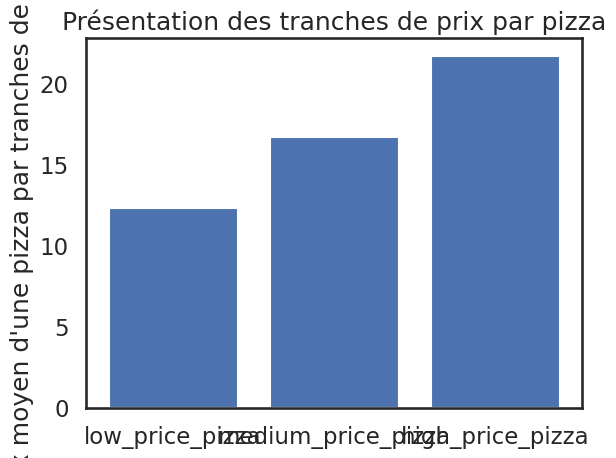

In [ ]:
# Si cette donnée nous intéresse réellement, il me parait plus judicieux de classifier les commandes dans une nouvelle colonne
# par tranches de prix totaux des commandes. ici 3 choisit arbitrairement. 1/3 par catégorie.

df['total_price_quartile'] = pd.qcut(df['total_price'], q=[0, 0.33,  0.66, 1],
    labels=['low_price_pizza', 'medium_price_pizza', 'high_price_pizza'])

temp_df_quarts = df.groupby('total_price_quartile')['total_price'].mean().reset_index()
plt.bar(temp_df_quarts['total_price_quartile'], temp_df_quarts['total_price'])
plt.ylabel('Prix moyen d\'une pizza par tranches de prix')
plt.title('Présentation des tranches de prix par pizza')
plt.show()


In [ ]:
# En toute honnêteté la colonne total_price ne permet pas de répondre proprement à la question, pour moi il faut créer une nouvelle colonne
# et traité la question par commande et non pas par pizza

if 'order_price' not in df.columns:
    df = pd.merge(df, df.groupby('order_id')['total_price'].sum().reset_index()\
        .rename(columns={'total_price': 'order_price'}), on='order_id', how='left')

<Axes: xlabel='total_price', ylabel='Count'>

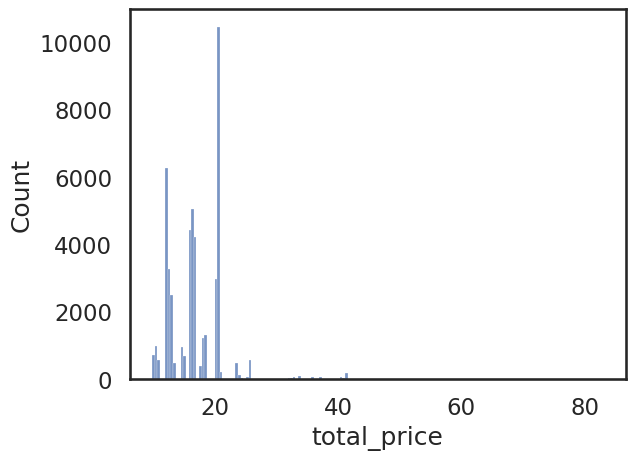

In [ ]:
sns.histplot(df.total_price)


In [ ]:
df.total_price.describe()

count    48620.000000
mean        16.821474
std          4.437398
min          9.750000
25%         12.750000
50%         16.500000
75%         20.500000
max         83.000000
Name: total_price, dtype: float64

In [ ]:
# Bonus perso faire la version sur une colonne order_price

## 9. Analyse du chiffre d’affaires en fonction du temps :

a. Quel est le chiffre d'affaires quotidien ?


Chiffre d'affaires quotidien
(Le Dataset étant réparti sur une année complète)

In [ ]:
# trie par jour nativement
df.groupby('order_date')['total_price'].sum()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64

Chiffre d'affaires quotidien moyen

In [ ]:
df.groupby('order_date')['total_price'].sum().mean()

2284.5252793296086

b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
commande ?

On réutilise la colonne order_price créée précédemment.

In [ ]:
if df['order_time'].dtype != 'datetime64[ns]':
    df['order_time'] = pd.to_datetime(df['order_time'].astype(str), format='%H:%M:%S')

temp_df = df.groupby([pd.Grouper(key='order_time', freq='H')])['total_price'].sum().reset_index()

temp_df['start_time'] = temp_df['order_time'].dt.strftime('%H')

temp_df['order_time_range'] = temp_df['start_time'] + '-' + (temp_df['order_time'] + pd.Timedelta(hours=1)).dt.strftime('%H') + 'h'
temp_df[['order_time_range', 'total_price']]


,order_time_range,total_price
0,09-10h,83.00
1,10-11h,303.65
2,11-12h,44935.80
3,12-13h,111877.90
4,13-14h,106065.70
5,14-15h,59201.40
6,15-16h,52992.30
7,16-17h,70055.40
8,17-18h,86237.45
9,18-19h,89296.85


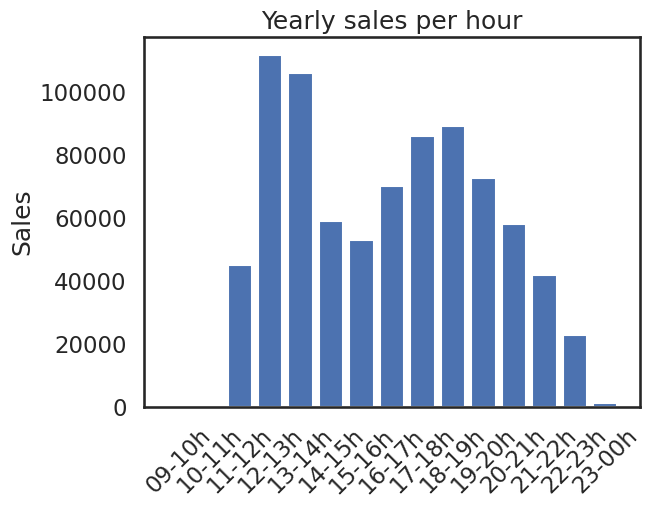

In [ ]:

plt.bar(temp_df['order_time_range'], temp_df['total_price'])
plt.ylabel('Sales')
plt.title('Yearly sales per hour')
plt.xticks(rotation=45)
plt.show()


## 10.Pizzas populaires :

a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [ ]:
df.groupby('pizza_id')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)\
    .reset_index().drop(columns='index')

# with pizza_name instead
# df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)\
#     .reset_index().drop(columns='index')


,pizza_id,quantity
0,big_meat_s,1914
1,thai_ckn_l,1410
2,five_cheese_l,1409
3,four_cheese_l,1316
4,classic_dlx_m,1181
...,...,...
86,mexicana_s,162
87,calabrese_s,99
88,ckn_alfredo_s,96
89,green_garden_l,95


b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
d'affaires ?

In [ ]:
df.groupby('pizza_id')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)\
    .reset_index().drop(columns='index')


,pizza_id,total_price
0,thai_ckn_l,29257.50
1,five_cheese_l,26066.50
2,four_cheese_l,23622.20
3,spicy_ital_l,23011.75
4,big_meat_s,22968.00
...,...,...
86,mexicana_s,1944.00
87,green_garden_l,1923.75
88,ckn_alfredo_s,1224.00
89,calabrese_s,1212.75


## 11.Chiffre d'affaires par taille et catégorie :

a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [ ]:
# trie par jour nativement
df.groupby('pizza_size')['total_price'].sum()

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de
pizza ?

In [ ]:
# trie par jour nativement
df.groupby('pizza_category')['total_price'].sum()

pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64

## 12.Corrélation entre prix et quantité :

a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

In [ ]:
# Le plus proche de 1, plus la corrélation est significante.
# Dans ce cas précis, elle est assez insignifiante dans la mesure où la plupart des commandes ne contiennent
df.quantity.corr(df.unit_price).round(5)

0.00714

b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

In [ ]:

df['pizza_size'] = pd.Categorical(df['pizza_size'], categories=['S', 'M', 'L', 'XL', 'XXL'],\
    ordered=True)
df.sort_values(by='pizza_size').groupby('pizza_size')['unit_price'].mean()

# bonus faire les deux


pizza_size
S      12.364328
M      15.951219
L      19.802553
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

In [ ]:
df.groupby('pizza_size')['total_price'].mean()

pizza_size
S      12.596484
M      16.209441
L      20.259025
XL     25.875000
XXL    35.950000
Name: total_price, dtype: float64

In [ ]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,total_price_quartile,order_price
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"[Sliced Ham, Pineapple, Mozzarella Cheese]",The Hawaiian Pizza,low_price_pizza,13.25
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"[Pepperoni, Mushrooms, Red Onions, Red Peppers...",The Classic Deluxe Pizza,medium_price_pizza,92.00
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"[Mozzarella Cheese, Provolone Cheese, Smoked G...",The Five Cheese Pizza,medium_price_pizza,92.00
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"[Calabrese Salami, Capocollo, Tomatoes, Red On...",The Italian Supreme Pizza,high_price_pizza,92.00
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, Red ...",The Mexicana Pizza,medium_price_pizza,92.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"[Chicken, Red Onions, Red Peppers, Mushrooms, ...",The Chicken Alfredo Pizza,medium_price_pizza,46.70
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"[Ricotta Cheese, Gorgonzola Piccante Cheese, M...",The Four Cheese Pizza,medium_price_pizza,46.70
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"[Tomatoes, Anchovies, Green Olives, Red Onions...",The Napolitana Pizza,low_price_pizza,46.70
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"[Tomatoes, Red Peppers, Jalapeno Peppers, Red ...",The Mexicana Pizza,high_price_pizza,20.25


## 13.Tendances saisonnières :

a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

In [ ]:
# df

In [ ]:
df['order_time']

0       1900-01-01 11:38:36
1       1900-01-01 11:57:40
2       1900-01-01 11:57:40
3       1900-01-01 11:57:40
4       1900-01-01 11:57:40
                ...        
48615   1900-01-01 21:23:10
48616   1900-01-01 21:23:10
48617   1900-01-01 21:23:10
48618   1900-01-01 22:09:54
48619   1900-01-01 23:02:05
Name: order_time, Length: 48620, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'order_time' to datetime if not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract the month from the 'order_time' column
df['month'] = df['order_date'].dt.month

# Create a dictionary to map months to seasons
seasons_mapping = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Map months to seasons
df['season'] = df['month'].map(seasons_mapping)

# Group by season and calculate the sum of pizza orders
seasonal_orders = df.groupby('season')['quantity'].sum().reset_index()

# Plot the results
plt.bar(seasonal_orders['season'], seasonal_orders['quantity'])
plt.xlabel('Season')
plt.ylabel('Total Pizza Orders')
plt.title('Seasonal Trends in Pizza Orders')
plt.show()

# Display the statistics
print(seasonal_orders)


,season,quantity
0,Fall,12039
1,Spring,12740
2,Summer,12667
3,Winter,12128


b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
commandes ?

In [ ]:
df['day'] = df['order_date'].dt.dayofweek

# Correlation insignifiante entre les deux variables
df['day'].corr(df['quantity'])

-0.002802198534612991

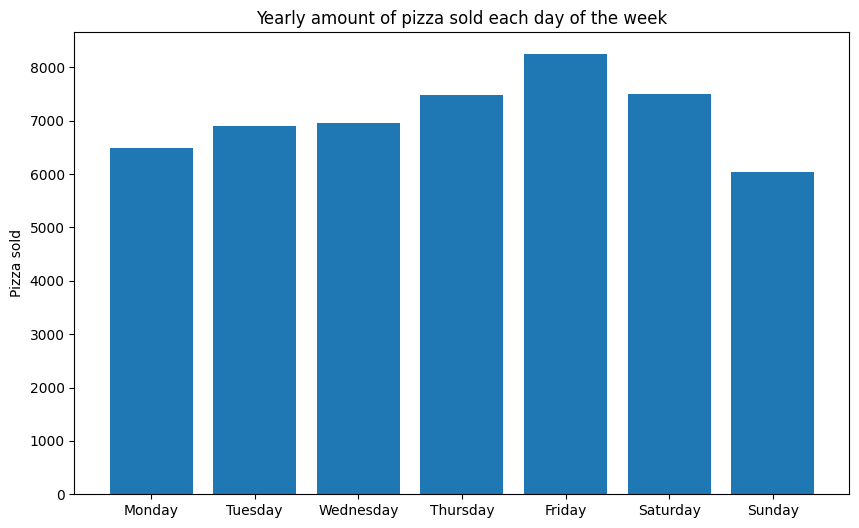

In [ ]:
temp_df = df.groupby('day')['quantity'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(temp_df['day'], temp_df['quantity'])
plt.ylabel('Pizza sold')
plt.title('Yearly amount of pizza sold each day of the week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


In [ ]:
# 5. Analyse des prix :
# a. Quel est le prix unitaire moyen des pizzas ?
# b. Quel est le prix total moyen d'une commande ?
# c. Quelle pizza a le prix unitaire le plus élevé ?
# 6. Répartition par taille et catégorie :
# a. Combien de pizzas de chaque taille ont été vendues ?
# b. Combien de pizzas y a-t-il dans chaque catégorie ?
# 7. Analyse des ingrédients :
# a. Quels sont les ingrédients les plus couramment utilisés dans toutes les
# pizzas ?
# b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,
# pepperoni, champignons) ?
# 8. Détails de la commande :
# a. Quelle est la répartition du nombre de pizzas par commande ?
# b. Quelle est la répartition des prix totaux pour les commandes ?
# 9. Analyse du chiffre d’affaires en fonction du temps :
# a. Quel est le chiffre d'affaires quotidien ?
# b. Y a-t-il une corrélation entre l'heure de la journée et le total de la
# commande ?
# 10.Pizzas populaires :
# a. Quelles sont les 5 pizzas les plus commandées en quantité ?

# b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre
# d'affaires ?

# 11.Chiffre d'affaires par taille et catégorie :
# a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?
# b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de
# pizza ?

# 12.Corrélation entre prix et quantité :
# a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?
# b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?
# 13.Tendances saisonnières :
# a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?
# b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de
# commandes ?

In [ ]:
# 1. Installez et importez Pandas.
# 2. Informations de base :


# a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de
# données ?
# b. Combien de commandes uniques (order_id distincts) figurent dans le jeu
# de données ?

# 3. Analyse temporelle :
# a. Quelle est la plage de dates dans le jeu de données ?
# b. Combien de commandes ont été passées chaque jour ?
# c. Quelle est la durée moyenne pour traiter une commande ?


# 4. Analyse de la quantité :
# a. Quelle est la quantité moyenne de pizzas commandées ?
# b. Quelle est la taille de pizza la plus fréquemment commandée ?
# c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

# The End

In [ ]:
!pip freeze > requirements.txt

In [ ]:
# ➔ Quels sont les jours et les heures où nous sommes le plus occupés ?
# df.order_date.apply(lambda x : x.day)

# ➔ Combien de pizzas fabriquons-nous pendant les périodes de pointe ?
# df.order_time.apply(lambda x : np.mean(x))
# ➔ Quelles sont les pizzas les plus vendues et les moins vendues ?

# ➔ Quelle est la valeur moyenne de nos commandes ?
